In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("../UncontrollableFactors-AprilData.csv")
data.columns

Index(['FacilityCode', 'facility_name', 'Clusters', 'Office Class',
       'FacilityOpeningDate', 'Current Working Year', '% AfricanAmerican',
       '% Hispanic', '% Uninsured', 'Median Normalised Income',
       'External comp Within 20 Miles', 'High School Graduates (5-7-10m)',
       'NPA Benchmarks', 'Fast Cas. Mexican Burger (.25m)',
       'Shop. Center GLA (1.5m)', 'Big Box Retailers (1.5m)',
       'Dental Chains (1m)', 'Delta Dental per 10K (10m)', '% Medicaid (10m)',
       'Years in DMA', 'Office Sq.Ft', 'Internal Competition',
       'TotalRevenuePerHour', 'EBITDAPerHour'],
      dtype='object')

In [3]:
data.drop(['FacilityCode', 'facility_name', 'Clusters', 'FacilityOpeningDate', 'EBITDAPerHour'], axis=1, inplace=True)

In [4]:
data['High School Graduates (5-7-10m)'] = data['High School Graduates (5-7-10m)'].str.replace('%','').astype(np.float64)
data['% Medicaid (10m)'] = data['% Medicaid (10m)'].str.replace('%','').astype(np.float64)
data['TotalRevenuePerHour'] = data['TotalRevenuePerHour'].str.replace('$', '').astype(np.int64)
# data['EBITDAPerHour'] = data['EBITDAPerHour'].str.replace('$', '').astype(np.int64)
data['% Hispanic'] = np.where(data['% Hispanic'] > 1, (data['% Hispanic']/100).round(2), data['% Hispanic'])

In [5]:
cols = ['% AfricanAmerican', '% Hispanic', '% Uninsured']
data[cols] = data[cols].apply(lambda x : x*100)

In [6]:
data['Office Sq.Ft'].fillna(data['Office Sq.Ft'].median(), inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data

Office Class  Current Working Year  % AfricanAmerican  % Hispanic  \
0       Suburban                    22               15.0        20.0   
1       Suburban                    22                7.0        18.0   
2          Urban                    22                2.0         4.0   
3     Most Urban                    22               15.0        19.0   
4       Suburban                    19                7.0        14.0   
..           ...                   ...                ...         ...   
886        Rural                    10               10.0        14.0   
887        Rural                    10                9.0         4.0   
888   Most Urban                    10                6.0        38.0   
889     Suburban                    10               12.0        15.0   
890     Suburban                    10                2.0         5.0   

     % Uninsured  Median Normalised Income  External comp Within 20 Miles  \
0            5.0                  76467.64                          463.0   
1            4.0                  66714.48                          293.0   
2            4.0                  72641.37                          289.0   
3           12.0                  93421.40                          452.0   
4           12.0                 133906.92                          471.0   
..           ...                       ...                            ...   
886          7.0                  79625.16                          200.0   
887         14.0                  78995.16                          125.0   
888         12.0                  61606.48                         1240.0   
889          6.0                  71393.40                          138.0   
890         15.0                  76165.92                           63.0   

     High School Graduates (5-7-10m)  NPA Benchmarks  \
0                               38.5             7.7   
1                               43.5             7.5   
2                               44.3             6.8   
3                               33.1             5.1   
4                               30.2             4.6   
..                               ...             ...   
886                             41.2             8.6   
887                             42.1             7.4   
888                             38.2             6.7   
889                             40.8            10.4   
890                             44.9             8.0   

     Fast Cas. Mexican Burger (.25m)  Shop. Center GLA (1.5m)  \
0                                0.0                1781005.0   
1                                0.0                 895999.0   
2                                1.0                 934543.0   
3                                0.0                      0.0   
4                                0.0                      0.0   
..                               ...                      ...   
886                              0.0                 737834.0   
887                              0.0                 182298.0   
888                              2.0                1179789.0   
889                              0.0                1468969.0   
890                              1.0                1085826.0   

     Big Box Retailers (1.5m)  Dental Chains (1m)  Delta Dental per 10K (10m)  \
0                         1.0                 0.0                    3.840141   
1                         3.0                 0.0                    1.854511   
2                         0.0                 0.0                    2.590615   
3                         0.0                 0.0                    3.742308   
4                         0.0                 0.0                    4.125406   
..                        ...                 ...                         ...   
886                       1.0                 1.0                    1.625645   
887                       0.0                 0.0                    3.912135   
888                

In [8]:
df = data.iloc[:, 1:-1].copy()

In [9]:
# Preprocessing the data to make it visualizable 
  
# Scaling the Data 
scaler = StandardScaler() 

cols = df.columns.to_list()

df_scaled = df.copy()
df_scaled[cols] = scaler.fit_transform(df_scaled[cols])
  
# Normalizing the Data 
df_normalized = df_scaled.copy()
df_normalized[cols] = normalize(df_scaled[cols]) 

In [10]:
df_normalized.head()

Current Working Year  % AfricanAmerican  % Hispanic  % Uninsured  \
0              0.617449           0.053129    0.195190    -0.269173   
1              0.585824          -0.096129    0.147124    -0.301939   
2              0.618040          -0.198038   -0.125917    -0.318543   
3              0.569032           0.048963    0.161396     0.068462   
4              0.325993          -0.067962    0.050188     0.049830   

   Median Normalised Income  External comp Within 20 Miles  \
0                  0.061806                       0.231467   
1                 -0.097072                       0.066227   
2                 -0.002582                       0.066061   
3                  0.319873                       0.203676   
4                  0.689794                       0.160366   

   High School Graduates (5-7-10m)  NPA Benchmarks  \
0                        -0.020793       -0.157267   
1                         0.102628       -0.168772   
2                         0.128926       -0.250277   
3                        -0.147520       -0.391924   
4                        -0.157545       -0.319834   

   Fast Cas. Mexican Burger (.25m)  Shop. Center GLA (1.5m)  \
0                        -0.161202                 0.246621   
1                        -0.152945                -0.027833   
2                         0.156013                -0.017334   
3                        -0.148561                -0.284513   
4                        -0.108131                -0.207083   

   Big Box Retailers (1.5m)  Dental Chains (1m)  Delta Dental per 10K (10m)  \
0                 -0.103305           -0.126248                    0.214266   
1                  0.326952           -0.119782                   -0.225832   
2                 -0.327573           -0.126369                   -0.070420   
3                 -0.301597           -0.116349                    0.176927   
4                 -0.219518           -0.084685                    0.187311   

   % Medicaid (10m)  Years in DMA  Office Sq.Ft  Internal Competition  
0          0.202303     -0.185836      0.127603              0.414423  
1          0.203248     -0.176318      0.241904              0.393197  
2          0.202497     -0.186014      0.230731              0.310057  
3          0.098581      0.243000      0.088019              0.092559  
4         -0.184038      0.247588     -0.123539             -0.002837

In [11]:
# Convert dataframe to matrix
df_oc = pd.concat([df_normalized, data['Office Class']], axis=1)
X = df_oc.to_numpy()

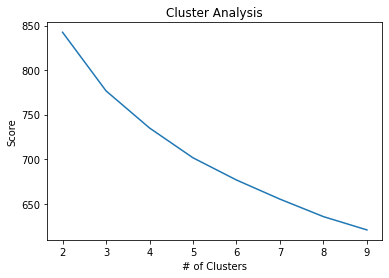

# of Clusters silhouette_score
0              2             0.10
1              3             0.10
2              4             0.10
3              5             0.10
4              6             0.10
5              7             0.09
6              8             0.09
7              9             0.10

In [12]:
#Choosing optimal K value
cost = []
scores = []

for cluster in range(2,10):
    kproto = KPrototypes(n_clusters=cluster, init='Huang', random_state=42, n_jobs=-2, n_init=50) 
    kproto.fit_predict(X, categorical=[17])
    cost.append(kproto.cost_)
    scores.append(silhouette_score(X[:,:-1], kproto.labels_))
    
sns.lineplot(range(2,10), cost)
plt.xlabel("# of Clusters")
plt.ylabel("Score")
plt.title("Cluster Analysis")
plt.show()

# Silhouette scores for different k values
table = pd.DataFrame({'# of Clusters':range(2,10), 'silhouette_score':['%.2f' % x for x in scores]})
table

In [13]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=5, init='Huang', verbose=0, random_state=42,max_iter=20, n_init=50,n_jobs=-2,gamma=.25) 
clusters = kproto.fit_predict(X, categorical=[17])

In [14]:
df_clusters_pca = df.copy()
df_clusters_pca['Cluster_ID'] = clusters
df_clusters_pca['TotalRevenuePerHour'] = data['TotalRevenuePerHour']
df_clusters_pca['Cluster_ID'].value_counts()

4    230
1    191
0    165
3    162
2    143
Name: Cluster_ID, dtype: int64

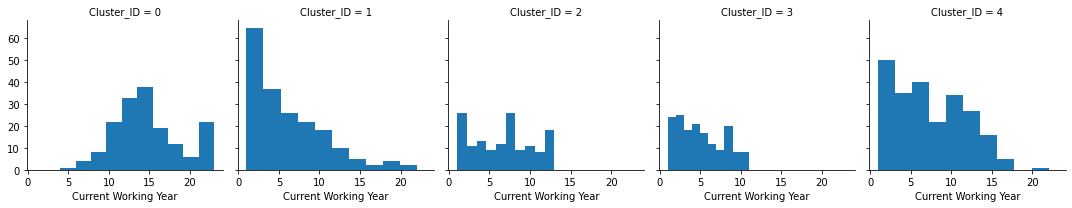

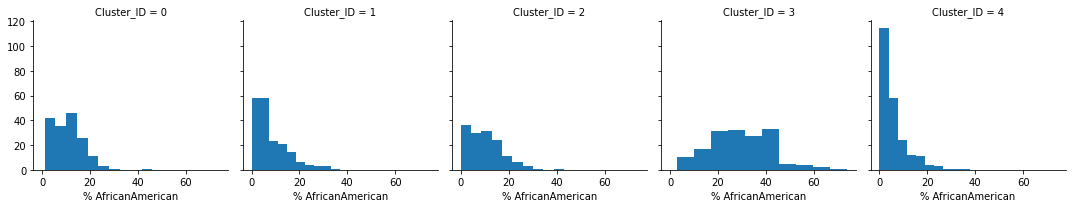

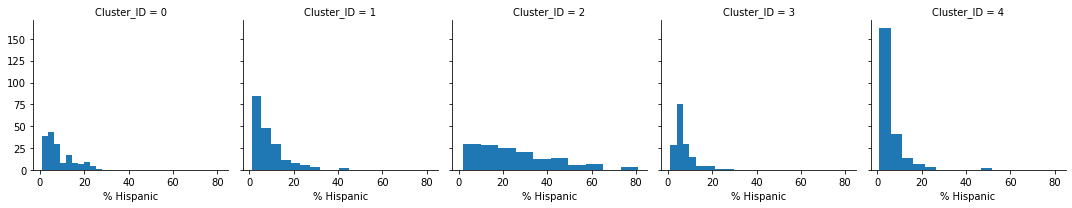

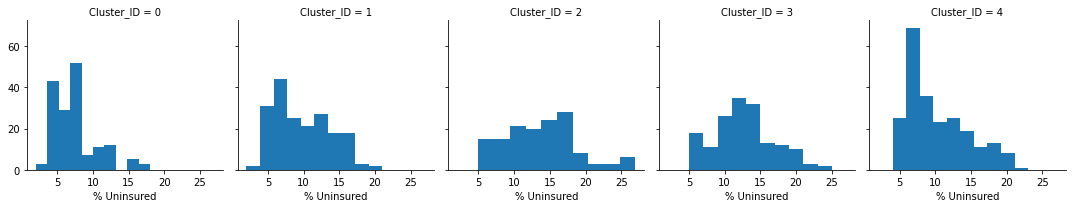

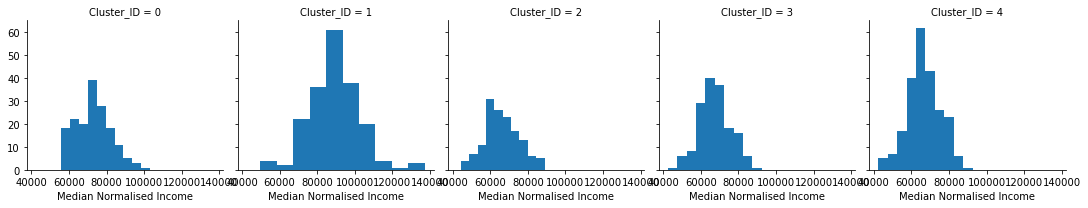

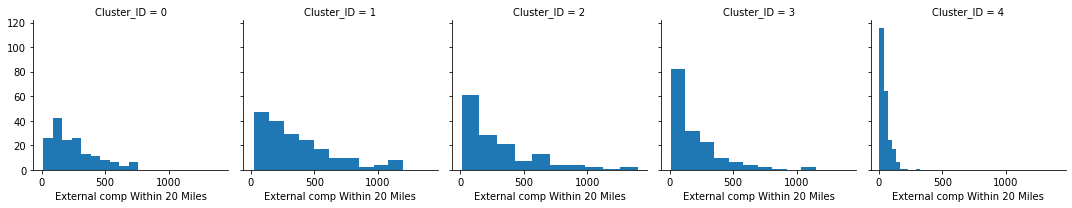

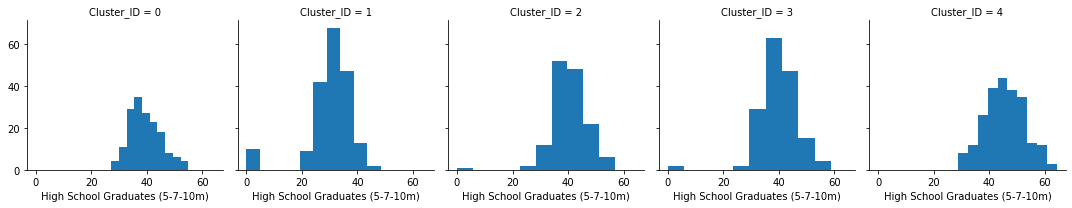

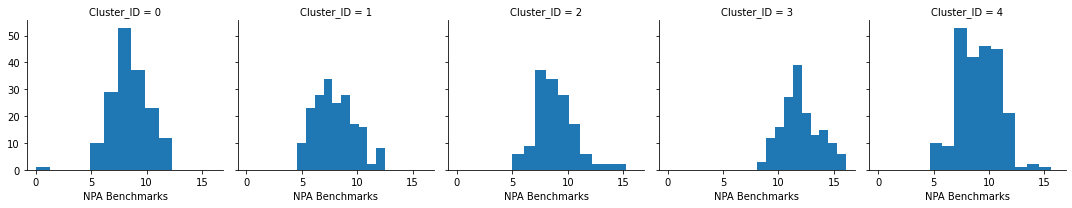

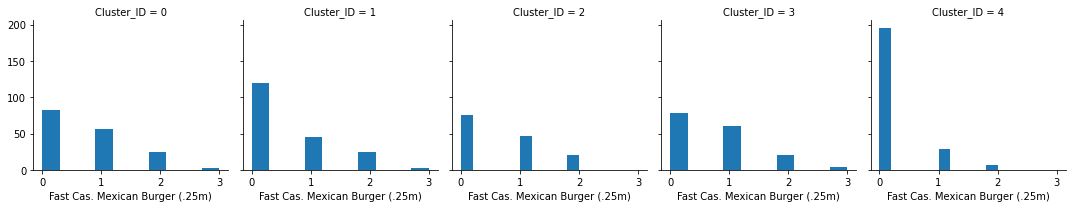

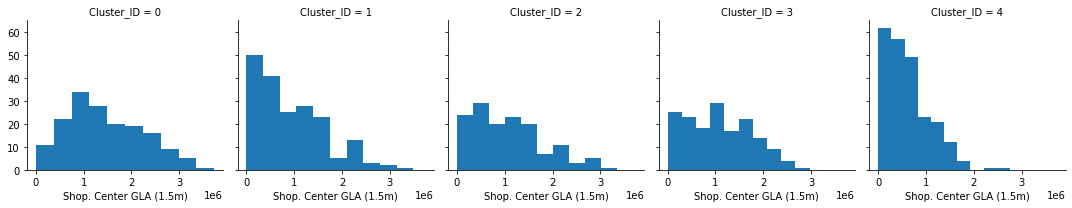

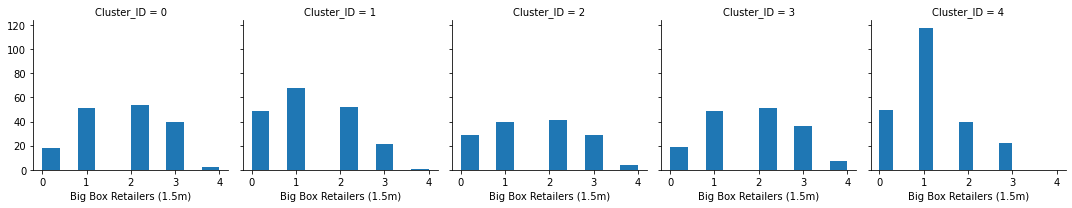

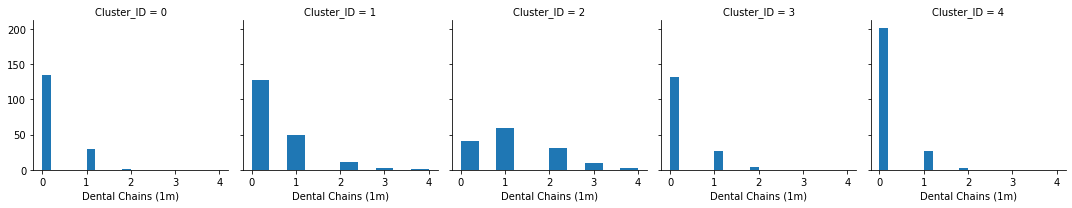

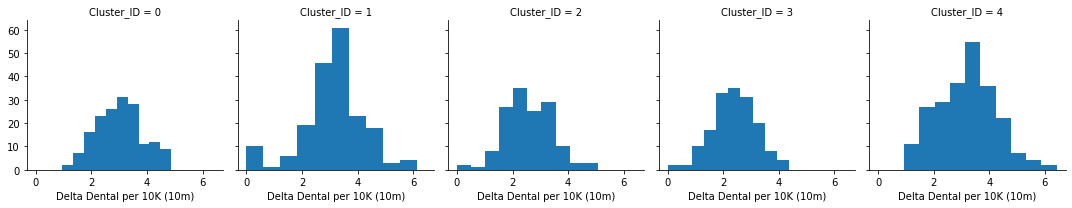

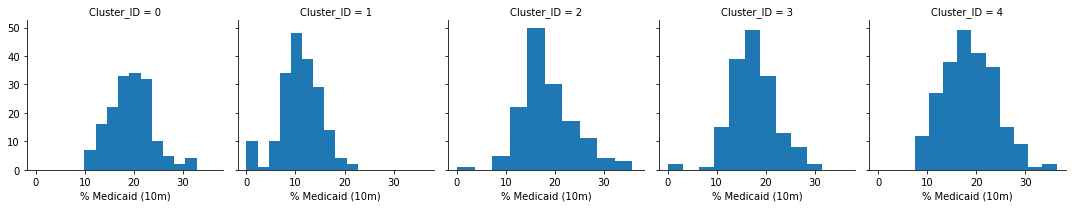

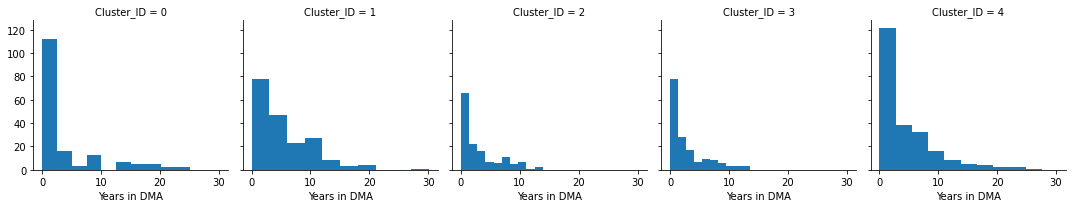

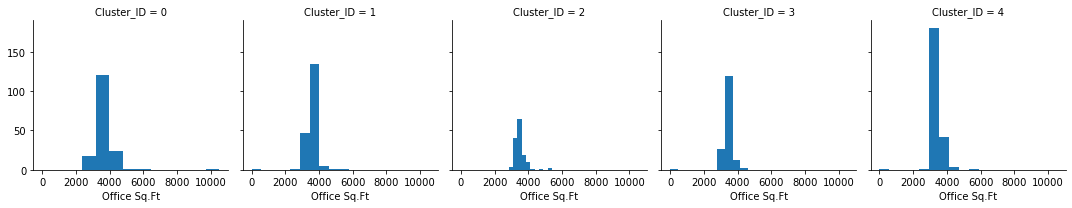

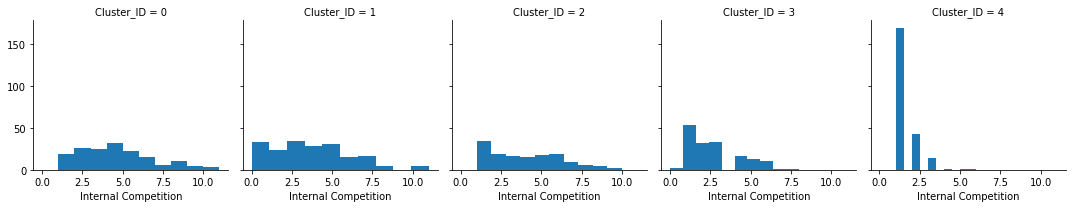

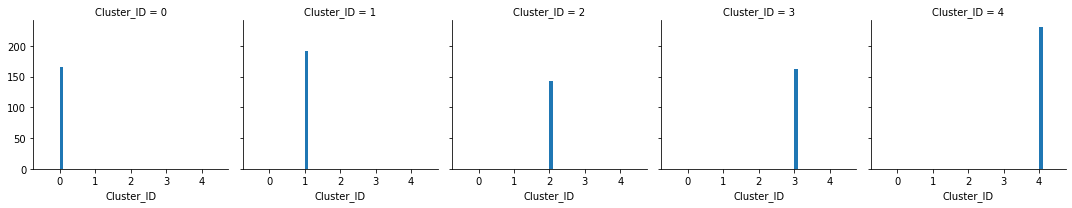

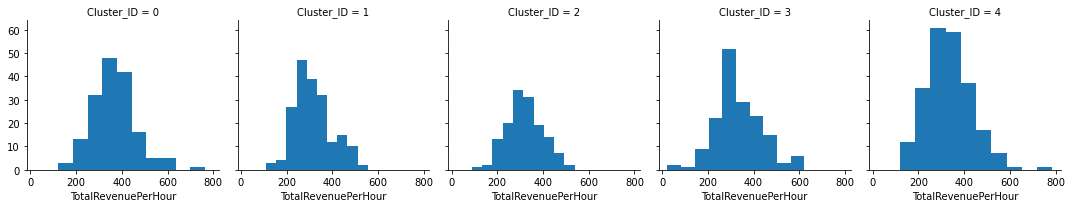

In [15]:
# sns.pairplot(df_clusters_pca, hue='Cluster_ID', palette='Dark2', diag_kind='kde')
for c in df_clusters_pca:
    grid = sns.FacetGrid(df_clusters_pca, col='Cluster_ID')
    grid.map(plt.hist, c)

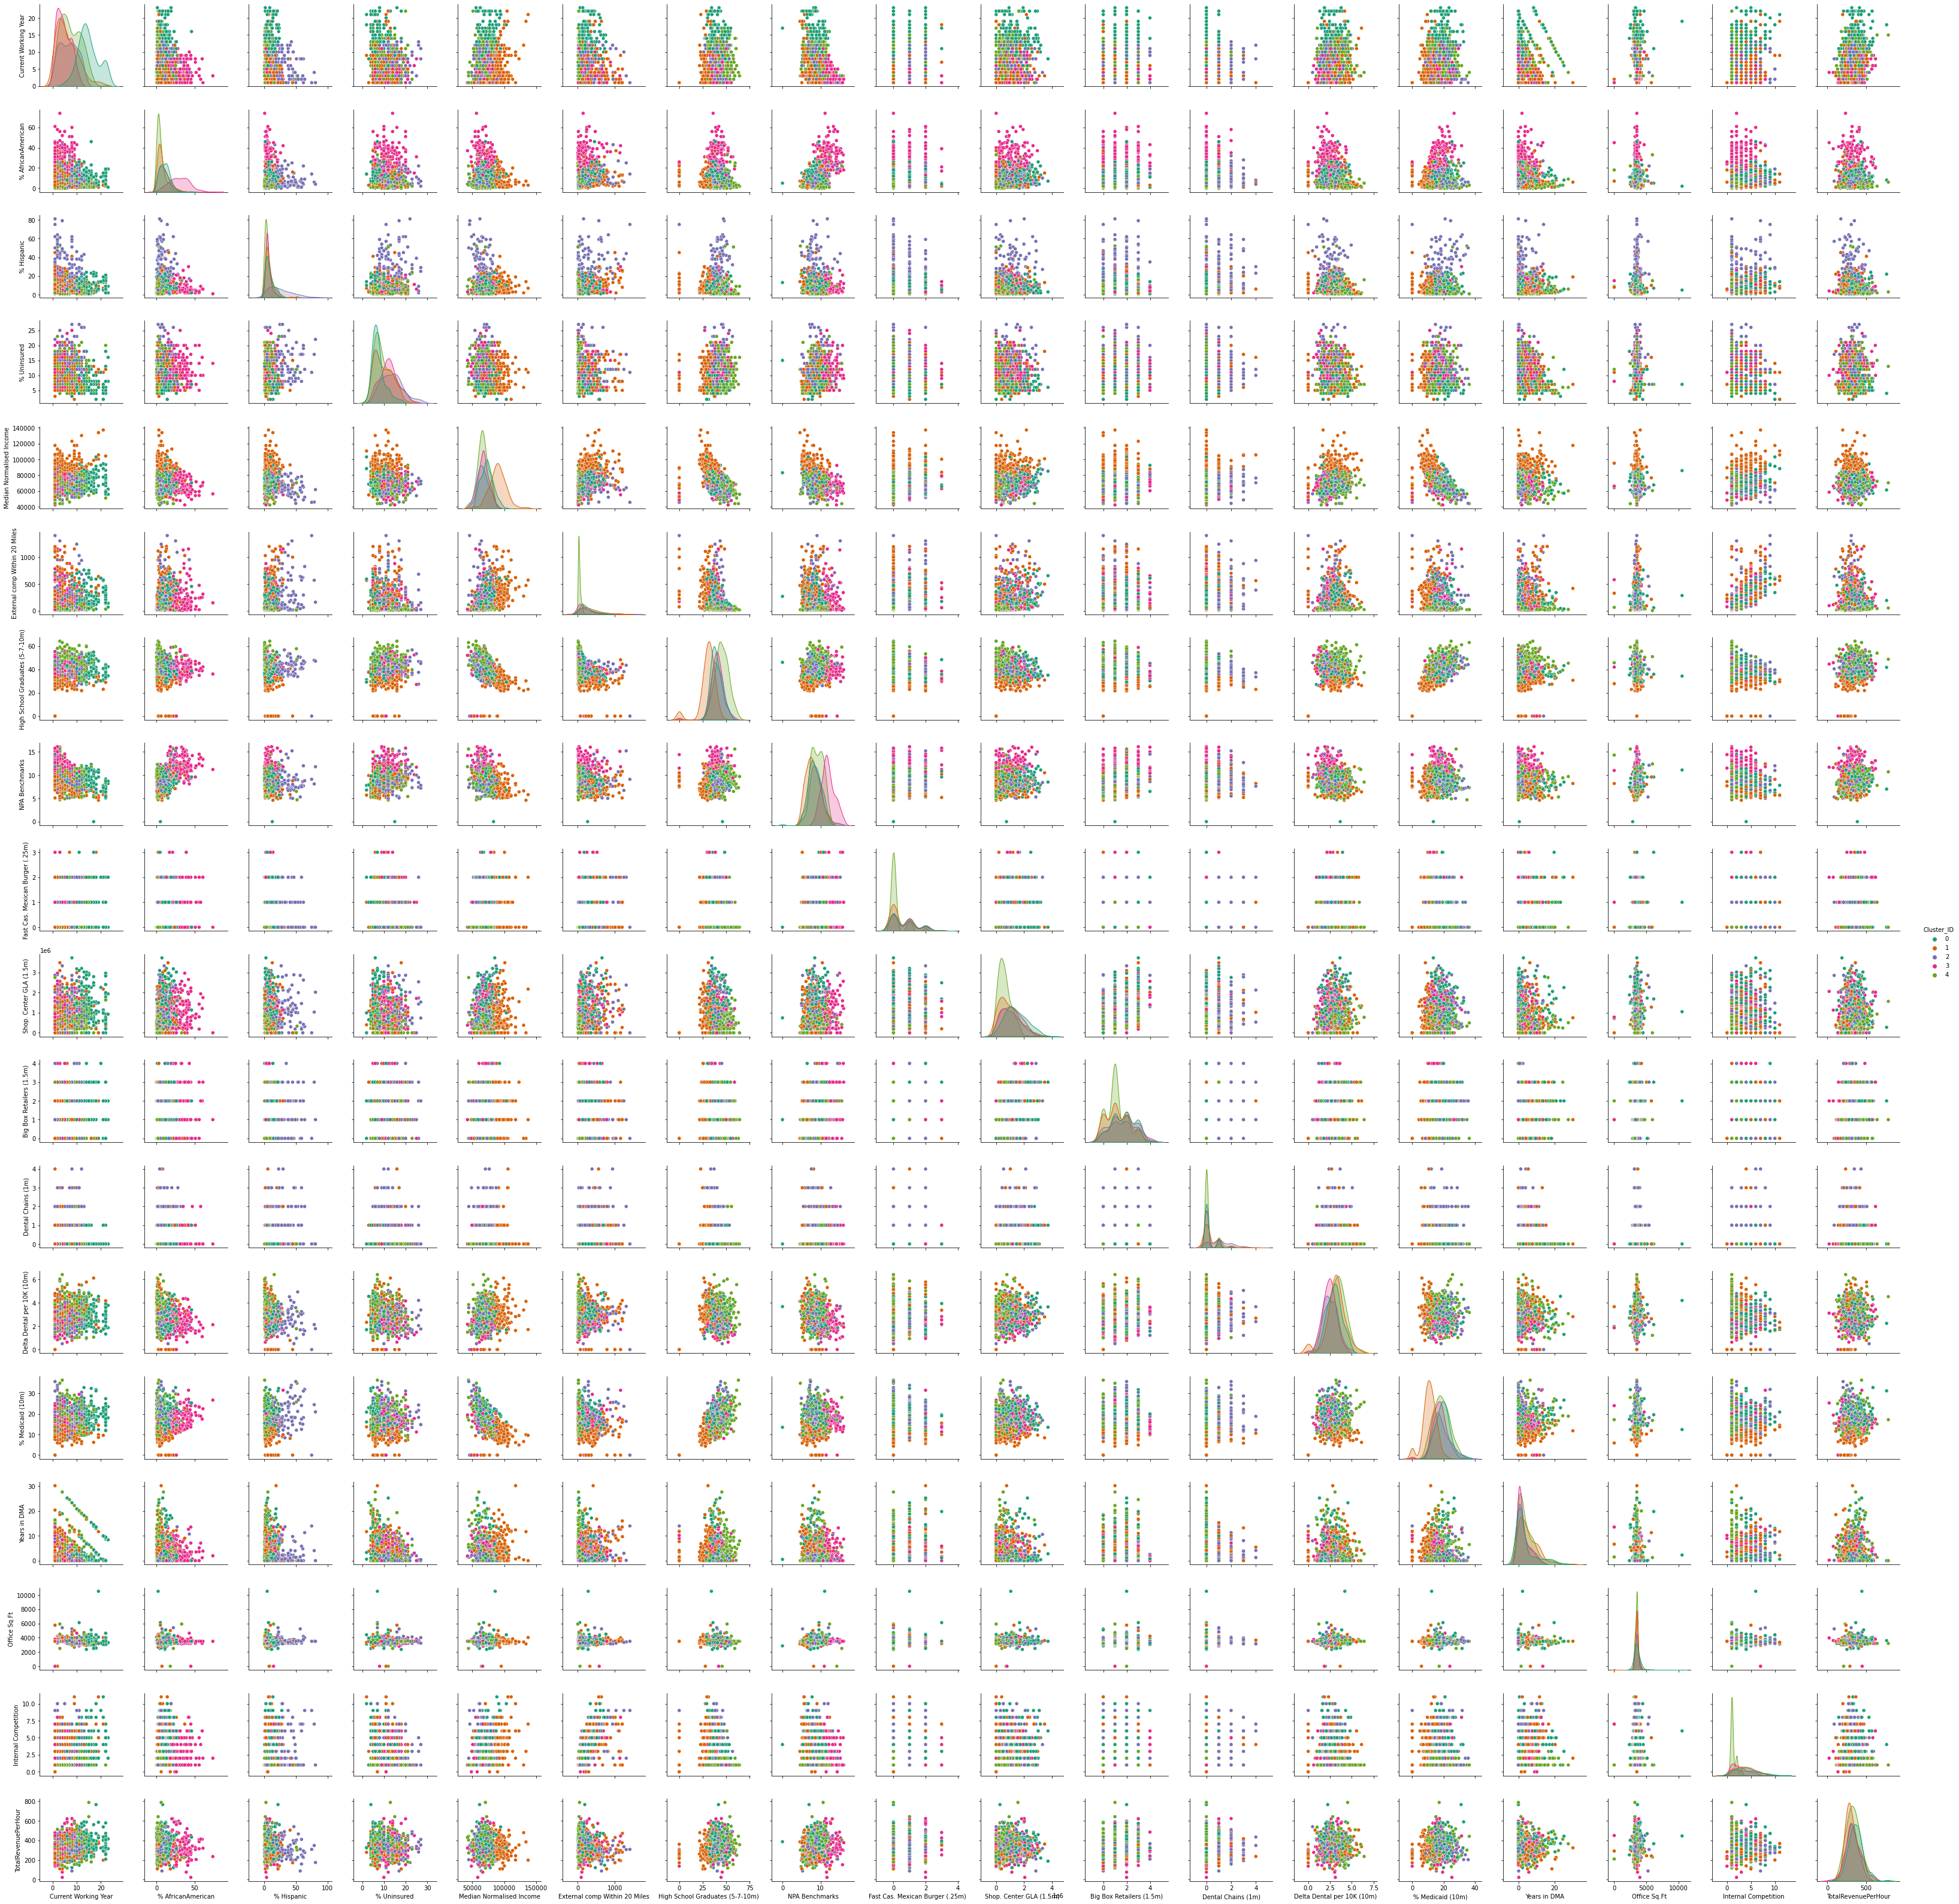

In [16]:
sns.pairplot(df_clusters_pca, hue='Cluster_ID', palette='Dark2', diag_kind='kde')